# Data Preparation Covid19 using KNN Imputation for Missing Value

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

# Input data

In [57]:
#from google.colab import files
#uploaded = files.upload()

In [58]:
df = pd.read_csv("covid_19_indonesia_time_series_all.csv")

In [59]:
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,489,20,73,...,106.836118,-6.204699,0.18,45.09,0.00,1.84,4.09%,14.93%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,491,20,73,...,106.836118,-6.204699,0.18,45.27,0.00,1.84,4.07%,14.87%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-JB,Jawa Barat,3,0,0,3,12,5,714,...,107.603708,-6.920432,0.07,0.27,0.00,0.11,41.67%,5950.00%,NaN,NaN
4,3/2/2020,ID-RI,Riau,1,0,0,1,2,1,0,...,101.805109,0.511648,0.16,0.33,0.00,0.16,50.00%,0.00%,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9534,12/19/2020,ID-SG,Sulawesi Tenggara,59,1,19,39,7478,123,6041,...,122.070311,-4.124689,22.39,2837.45,0.38,46.67,1.64%,80.78%,1.09,1.00
9535,12/19/2020,ID-SA,Sulawesi Utara,164,2,3,159,8780,278,6145,...,124.521240,1.259638,62.08,3323.39,0.76,105.23,3.17%,69.99%,0.80,0.50
9536,12/19/2020,ID-SB,Sumatera Barat,135,5,34,96,22331,467,17668,...,100.465062,-0.850253,24.46,4046.02,0.91,84.61,2.09%,79.12%,1.23,0.83
9537,12/19/2020,ID-SS,Sumatera Selatan,89,3,43,43,10763,569,8715,...,104.169465,-3.216212,10.83,1309.76,0.37,69.24,5.29%,80.97%,0.72,3.00


In [60]:
df.corr()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,...,Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Growth Factor of New Cases,Growth Factor of New Deaths
New Cases,1.000000,0.922140,0.955653,0.537038,0.957287,0.951934,0.938214,0.971725,NaN,0.708368,...,0.719274,0.142270,-0.039572,-0.006112,0.238306,0.235678,0.156513,0.257679,-0.009972,0.039123
New Deaths,0.922140,1.000000,0.899200,0.430396,0.868647,0.914572,0.838008,0.936401,NaN,0.774779,...,0.790505,0.083904,-0.040747,-0.019448,0.124891,0.135521,0.221701,0.204171,-0.024779,0.121248
New Recovered,0.955653,0.899200,1.000000,0.265016,0.949021,0.944696,0.932351,0.952226,NaN,0.677347,...,0.688331,0.154017,-0.041885,-0.004745,0.215554,0.255485,0.162496,0.276058,-0.025371,0.035551
New Active Cases,0.537038,0.430396,0.265016,1.000000,0.418211,0.408403,0.404744,0.451063,NaN,0.368103,...,0.371841,0.029429,-0.009297,-0.005123,0.171354,0.048083,0.040184,0.056728,0.041081,0.018527
Total Cases,0.957287,0.868647,0.949021,0.418211,1.000000,0.976995,0.997076,0.935771,NaN,0.633872,...,0.642059,0.128257,-0.029167,-0.005791,0.198495,0.278236,0.142605,0.299961,-0.024490,0.028807
Total Deaths,0.951934,0.914572,0.944696,0.408403,0.976995,1.000000,0.965940,0.944945,NaN,0.685853,...,0.700290,0.086903,-0.031974,-0.021510,0.138272,0.199123,0.132157,0.275024,-0.027902,0.031156
Total Recovered,0.938214,0.838008,0.932351,0.404744,0.997076,0.965940,1.000000,0.906243,NaN,0.592346,...,0.600661,0.133107,-0.029087,-0.007982,0.205882,0.297229,0.144049,0.314613,-0.023422,0.026842
Total Active Cases,0.971725,0.936401,0.952226,0.451063,0.935771,0.944945,0.906243,1.000000,NaN,0.772982,...,0.778589,0.102364,-0.026560,0.008564,0.158236,0.178624,0.125833,0.208678,-0.026963,0.035531
City or Regency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Regencies,0.708368,0.774779,0.677347,0.368103,0.633872,0.685853,0.592346,0.772982,NaN,1.000000,...,0.980853,-0.065961,0.013398,0.076251,-0.033629,-0.033543,-0.006951,-0.007961,-0.021611,0.027268


<AxesSubplot:>

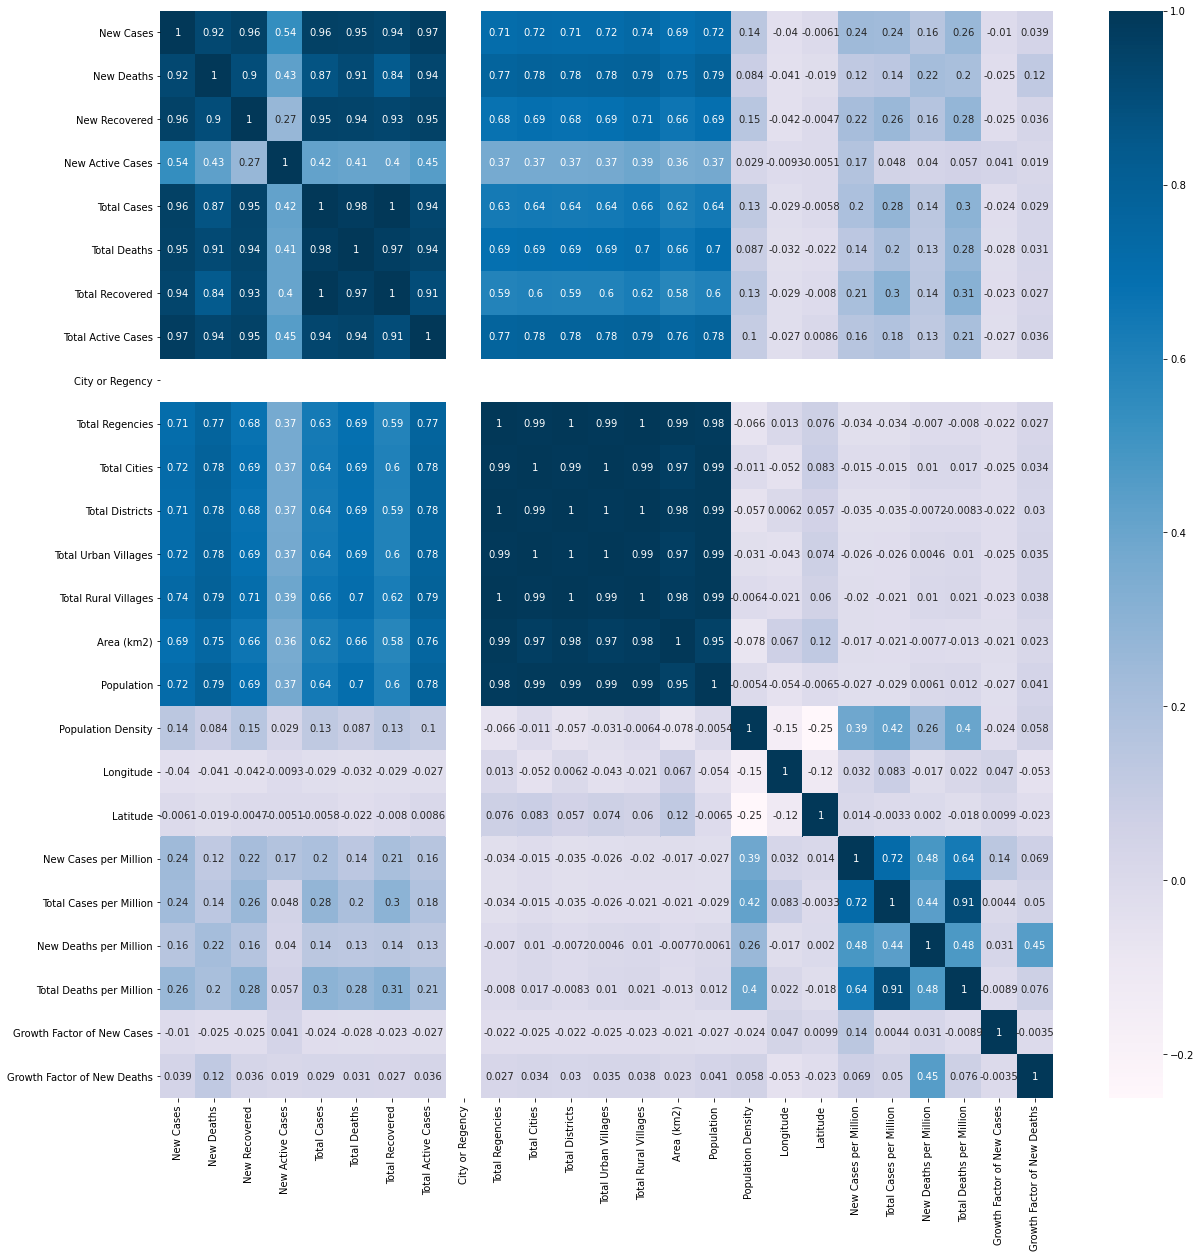

In [61]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="PuBu")

In [7]:
df.isnull().sum()

Date                              0
Location ISO Code                 0
Location                          0
New Cases                         0
New Deaths                        0
New Recovered                     0
New Active Cases                  0
Total Cases                       0
Total Deaths                      0
Total Recovered                   0
Total Active Cases                0
Location Level                    0
City or Regency                9539
Province                        293
Country                           0
Continent                         0
Island                          293
Time Zone                       293
Special Status                 8156
Total Regencies                   0
Total Cities                    267
Total Districts                   0
Total Urban Villages            269
Total Rural Villages            294
Area (km2)                        0
Population                        0
Population Density                0
Longitude                   

#Data Cleaning

In [8]:
df=df.drop(
    ['City or Regency','Special Status'],
    axis = 1)
#These features have been droped because the correlation betweet the features and the target is low and 
#there are too many missing value of these features

In [9]:
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,489,20,73,...,106.836118,-6.204699,0.18,45.09,0.00,1.84,4.09%,14.93%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,491,20,73,...,106.836118,-6.204699,0.18,45.27,0.00,1.84,4.07%,14.87%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-JB,Jawa Barat,3,0,0,3,12,5,714,...,107.603708,-6.920432,0.07,0.27,0.00,0.11,41.67%,5950.00%,NaN,NaN
4,3/2/2020,ID-RI,Riau,1,0,0,1,2,1,0,...,101.805109,0.511648,0.16,0.33,0.00,0.16,50.00%,0.00%,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9534,12/19/2020,ID-SG,Sulawesi Tenggara,59,1,19,39,7478,123,6041,...,122.070311,-4.124689,22.39,2837.45,0.38,46.67,1.64%,80.78%,1.09,1.00
9535,12/19/2020,ID-SA,Sulawesi Utara,164,2,3,159,8780,278,6145,...,124.521240,1.259638,62.08,3323.39,0.76,105.23,3.17%,69.99%,0.80,0.50
9536,12/19/2020,ID-SB,Sumatera Barat,135,5,34,96,22331,467,17668,...,100.465062,-0.850253,24.46,4046.02,0.91,84.61,2.09%,79.12%,1.23,0.83
9537,12/19/2020,ID-SS,Sumatera Selatan,89,3,43,43,10763,569,8715,...,104.169465,-3.216212,10.83,1309.76,0.37,69.24,5.29%,80.97%,0.72,3.00


In [10]:
df.isnull().sum()

Date                              0
Location ISO Code                 0
Location                          0
New Cases                         0
New Deaths                        0
New Recovered                     0
New Active Cases                  0
Total Cases                       0
Total Deaths                      0
Total Recovered                   0
Total Active Cases                0
Location Level                    0
Province                        293
Country                           0
Continent                         0
Island                          293
Time Zone                       293
Total Regencies                   0
Total Cities                    267
Total Districts                   0
Total Urban Villages            269
Total Rural Villages            294
Area (km2)                        0
Population                        0
Population Density                0
Longitude                         0
Latitude                          0
New Cases per Million       

Check the distribution of the data

array([[<AxesSubplot:title={'center':'New Cases'}>,
        <AxesSubplot:title={'center':'New Deaths'}>,
        <AxesSubplot:title={'center':'New Recovered'}>,
        <AxesSubplot:title={'center':'New Active Cases'}>,
        <AxesSubplot:title={'center':'Total Cases'}>],
       [<AxesSubplot:title={'center':'Total Deaths'}>,
        <AxesSubplot:title={'center':'Total Recovered'}>,
        <AxesSubplot:title={'center':'Total Active Cases'}>,
        <AxesSubplot:title={'center':'Total Regencies'}>,
        <AxesSubplot:title={'center':'Total Cities'}>],
       [<AxesSubplot:title={'center':'Total Districts'}>,
        <AxesSubplot:title={'center':'Total Urban Villages'}>,
        <AxesSubplot:title={'center':'Total Rural Villages'}>,
        <AxesSubplot:title={'center':'Area (km2)'}>,
        <AxesSubplot:title={'center':'Population'}>],
       [<AxesSubplot:title={'center':'Population Density'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'cent

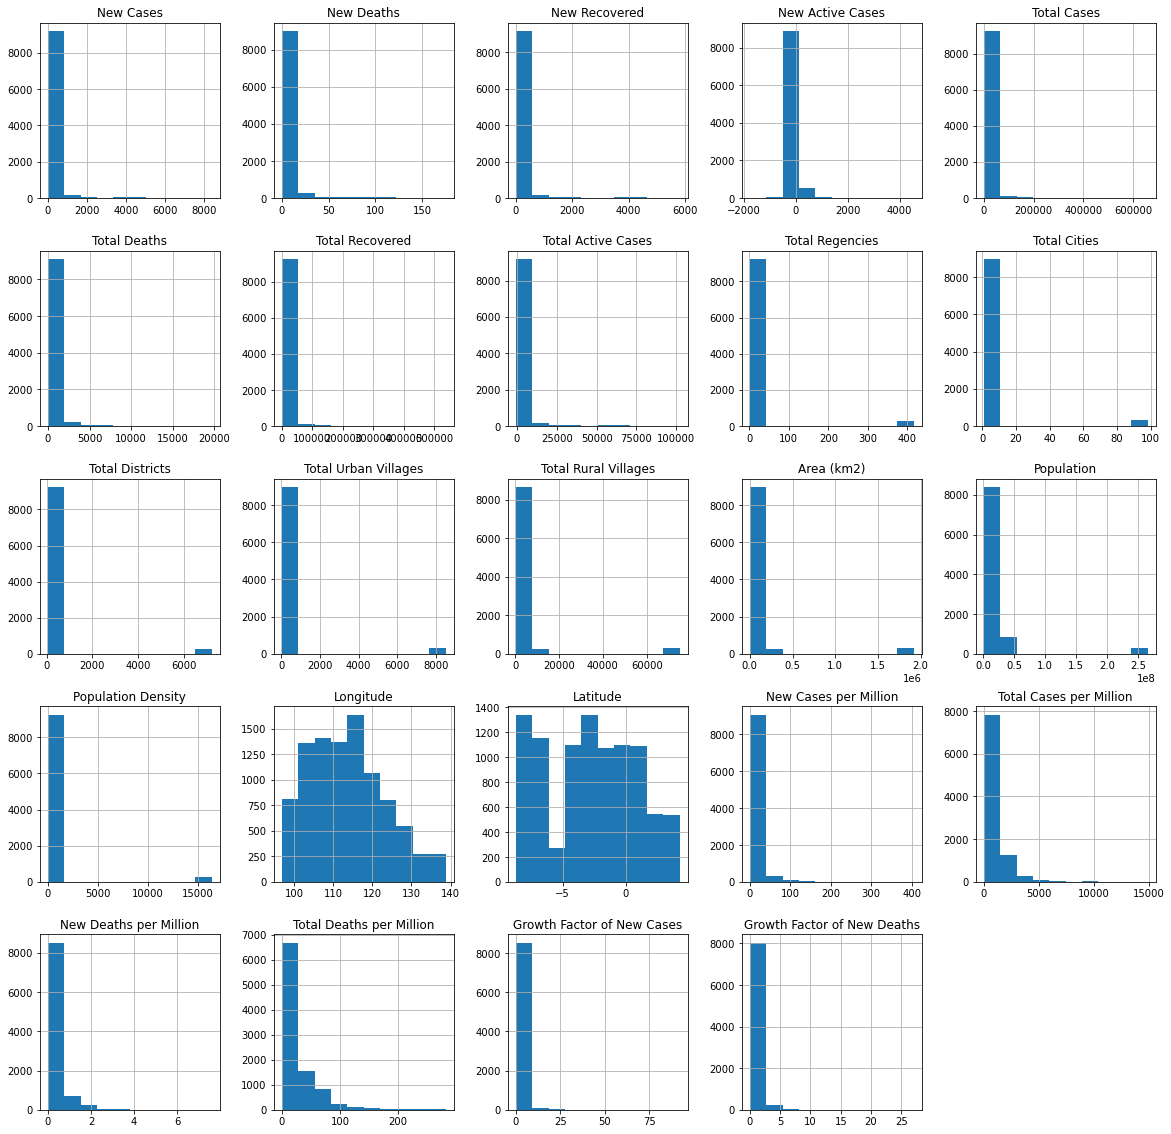

In [11]:
plt.rcParams['figure.figsize']=(20,20)
df.hist()

In [12]:
df['Province'].mode()

0    DKI Jakarta
dtype: object

In [13]:
df['Province'] = df['Province'].fillna("DKI Jakarta")

In [14]:
df['Island'].mode()

0    Sumatera
dtype: object

In [15]:
df['Island']=df['Island'].fillna('Sumatera')

In [16]:
df['Time Zone'].mode()

0    UTC+07:00
dtype: object

In [17]:
df['Time Zone'] = df['Time Zone'].fillna('UTC+07:00')

In [18]:
df.isnull().sum()

Date                              0
Location ISO Code                 0
Location                          0
New Cases                         0
New Deaths                        0
New Recovered                     0
New Active Cases                  0
Total Cases                       0
Total Deaths                      0
Total Recovered                   0
Total Active Cases                0
Location Level                    0
Province                          0
Country                           0
Continent                         0
Island                            0
Time Zone                         0
Total Regencies                   0
Total Cities                    267
Total Districts                   0
Total Urban Villages            269
Total Rural Villages            294
Area (km2)                        0
Population                        0
Population Density                0
Longitude                         0
Latitude                          0
New Cases per Million       

# KNN Imputation for Missing Value

In [19]:
data = df[['Total Cities', 'Total Urban Villages', 'Total Rural Villages', 'Growth Factor of New Cases', 'Growth Factor of New Deaths']]

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
data.head()

,Total Cities,Total Urban Villages,Total Rural Villages,Growth Factor of New Cases,Growth Factor of New Deaths
0,0.041237,0.027446,NaN,NaN,NaN
1,0.041237,0.027446,NaN,0.01087,0.037037
2,1.000000,1.000000,1.000000,NaN,NaN
3,0.082474,0.072164,0.067450,NaN,NaN
4,0.010309,0.027564,0.017622,NaN,NaN


In [21]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data = pd.DataFrame(imputer.fit_transform(data),columns = data.columns)

In [22]:
data

,Total Cities,Total Urban Villages,Total Rural Villages,Growth Factor of New Cases,Growth Factor of New Deaths
0,0.041237,0.027446,0.083318,0.011326,0.040444
1,0.041237,0.027446,0.083318,0.010870,0.037037
2,1.000000,1.000000,1.000000,0.011435,0.035111
3,0.082474,0.072164,0.067450,0.031261,0.022815
4,0.010309,0.027564,0.017622,0.009043,0.037037
...,...,...,...,...,...
9534,0.010309,0.040459,0.021907,0.011848,0.037037
9535,0.030928,0.035135,0.016497,0.008696,0.018519
9536,0.061856,0.023069,0.008744,0.013370,0.030741
9537,0.030928,0.041642,0.034522,0.007826,0.111111


In [23]:
data.isnull().sum()


Total Cities                   0
Total Urban Villages           0
Total Rural Villages           0
Growth Factor of New Cases     0
Growth Factor of New Deaths    0
dtype: int64

In [24]:
different_cols = df.columns.difference(data.columns)
different_cols

Index(['Area (km2)', 'Case Fatality Rate', 'Case Recovered Rate', 'Continent',
       'Country', 'Date', 'Island', 'Latitude', 'Location',
       'Location ISO Code', 'Location Level', 'Longitude', 'New Active Cases',
       'New Cases', 'New Cases per Million', 'New Deaths',
       'New Deaths per Million', 'New Recovered', 'Population',
       'Population Density', 'Province', 'Time Zone', 'Total Active Cases',
       'Total Cases', 'Total Cases per Million', 'Total Deaths',
       'Total Deaths per Million', 'Total Districts', 'Total Recovered',
       'Total Regencies'],
      dtype='object')

In [25]:
df = df[different_cols]

In [26]:
df.isnull().sum()

Area (km2)                  0
Case Fatality Rate          0
Case Recovered Rate         0
Continent                   0
Country                     0
Date                        0
Island                      0
Latitude                    0
Location                    0
Location ISO Code           0
Location Level              0
Longitude                   0
New Active Cases            0
New Cases                   0
New Cases per Million       0
New Deaths                  0
New Deaths per Million      0
New Recovered               0
Population                  0
Population Density          0
Province                    0
Time Zone                   0
Total Active Cases          0
Total Cases                 0
Total Cases per Million     0
Total Deaths                0
Total Deaths per Million    0
Total Districts             0
Total Recovered             0
Total Regencies             0
dtype: int64

In [27]:
pip install python-dateutil

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Ahya' is not recognized as an internal or external command,
operable program or batch file.


In [28]:
from dateutil import parser

In [29]:
for i in (df['Date']):
      d = parser.parse(i) 
      #print(d.strftime("%Y-%m-%d"))

In [30]:
df

,Area (km2),Case Fatality Rate,Case Recovered Rate,Continent,Country,Date,Island,Latitude,Location,Location ISO Code,...,Province,Time Zone,Total Active Cases,Total Cases,Total Cases per Million,Total Deaths,Total Deaths per Million,Total Districts,Total Recovered,Total Regencies
0,664,4.09%,14.93%,Asia,Indonesia,3/1/2020,Jawa,-6.204699,DKI Jakarta,ID-JK,...,DKI Jakarta,UTC+07:00,396,489,45.09,20,1.84,44,73,1
1,664,4.07%,14.87%,Asia,Indonesia,3/2/2020,Jawa,-6.204699,DKI Jakarta,ID-JK,...,DKI Jakarta,UTC+07:00,398,491,45.27,20,1.84,44,73,1
2,1916907,0.00%,0.00%,Asia,Indonesia,3/2/2020,Sumatera,-0.789275,Indonesia,IDN,...,DKI Jakarta,UTC+07:00,2,2,0.01,0,0.00,7230,0,416
3,35378,41.67%,5950.00%,Asia,Indonesia,3/2/2020,Jawa,-6.920432,Jawa Barat,ID-JB,...,Jawa Barat,UTC+07:00,-707,12,0.27,5,0.11,627,714,18
4,87024,50.00%,0.00%,Asia,Indonesia,3/2/2020,Sumatera,0.511648,Riau,ID-RI,...,Riau,UTC+07:00,1,2,0.33,1,0.16,169,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9534,38068,1.64%,80.78%,Asia,Indonesia,12/19/2020,Sulawesi,-4.124689,Sulawesi Tenggara,ID-SG,...,Sulawesi Tenggara,UTC+08:00,1314,7478,2837.45,123,46.67,219,6041,15
9535,13892,3.17%,69.99%,Asia,Indonesia,12/19/2020,Sulawesi,1.259638,Sulawesi Utara,ID-SA,...,Sulawesi Utara,UTC+08:00,2357,8780,3323.39,278,105.23,171,6145,11
9536,42013,2.09%,79.12%,Asia,Indonesia,12/19/2020,Sumatera,-0.850253,Sumatera Barat,ID-SB,...,Sumatera Barat,UTC+07:00,4196,22331,4046.02,467,84.61,179,17668,12
9537,91592,5.29%,80.97%,Asia,Indonesia,12/19/2020,Sumatera,-3.216212,Sumatera Selatan,ID-SS,...,Sumatera Selatan,UTC+07:00,1479,10763,1309.76,569,69.24,241,8715,13


# Normalisasi

In [31]:
df['Case Fatality Rate'] = (pd.to_numeric(df['Case Fatality Rate'].str[:-1])
                            .div(100)
                            .mask(df['Case Fatality Rate'] == '%', 0))


<ipython-input-31-98248aa83c7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Case Fatality Rate'] = (pd.to_numeric(df['Case Fatality Rate'].str[:-1])


In [34]:
df['Case Recovered Rate'] = (pd.to_numeric(df['Case Recovered Rate'].str[:-1])
                            .div(100)
                            .mask(df['Case Recovered Rate'] == '%', 0))

<ipython-input-34-42b119ea46db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Case Recovered Rate'] = (pd.to_numeric(df['Case Recovered Rate'].str[:-1])


In [35]:
for i in ['New Cases','New Deaths','New Recovered','New Active Cases','Total Cases','Total Deaths','Total Recovered','Total Active Cases','Total Regencies','Total Districts','Area (km2)','Population','Population Density','Longitude','Latitude','New Cases per Million','Total Cases per Million','New Deaths per Million','New Deaths per Million','Case Fatality Rate',	'Case Recovered Rate']:
   df[i] = (df[i]-min(df[i]))/(max(df[i])-min(df[i]))

<ipython-input-35-252f581078b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = (df[i]-min(df[i]))/(max(df[i])-min(df[i]))


In [36]:
df

,Area (km2),Case Fatality Rate,Case Recovered Rate,Continent,Country,Date,Island,Latitude,Location,Location ISO Code,...,Province,Time Zone,Total Active Cases,Total Cases,Total Cases per Million,Total Deaths,Total Deaths per Million,Total Districts,Total Recovered,Total Regencies
0,0.000000,0.02045,0.002509,Asia,Indonesia,3/1/2020,Jawa,0.191938,DKI Jakarta,ID-JK,...,DKI Jakarta,UTC+07:00,0.010736,0.000742,0.003027,0.001017,1.84,0.000000,0.000136,0.000000
1,0.000000,0.02035,0.002499,Asia,Indonesia,3/2/2020,Jawa,0.191938,DKI Jakarta,ID-JK,...,DKI Jakarta,UTC+07:00,0.010756,0.000745,0.003039,0.001017,1.84,0.000000,0.000136,0.000000
2,1.000000,0.00000,0.000000,Asia,Indonesia,3/2/2020,Sumatera,0.611484,Indonesia,IDN,...,DKI Jakarta,UTC+07:00,0.006901,0.000002,0.000000,0.000000,0.00,1.000000,0.000000,1.000000
3,0.018116,0.20835,1.000000,Asia,Indonesia,3/2/2020,Jawa,0.136489,Jawa Barat,ID-JB,...,Jawa Barat,UTC+07:00,0.000000,0.000017,0.000017,0.000254,0.11,0.081130,0.001331,0.040964
4,0.045067,0.25000,0.000000,Asia,Indonesia,3/2/2020,Sumatera,0.712270,Riau,ID-RI,...,Riau,UTC+07:00,0.006891,0.000002,0.000021,0.000051,0.16,0.017395,0.000000,0.021687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9534,0.019519,0.00820,0.013576,Asia,Indonesia,12/19/2020,Sulawesi,0.353082,Sulawesi Tenggara,ID-SG,...,Sulawesi Tenggara,UTC+08:00,0.019672,0.011364,0.190537,0.006257,46.67,0.024353,0.011265,0.033735
9535,0.006903,0.01585,0.011763,Asia,Indonesia,12/19/2020,Sulawesi,0.770219,Sulawesi Utara,ID-SA,...,Sulawesi Utara,UTC+08:00,0.029824,0.013343,0.223168,0.014141,105.23,0.017673,0.011459,0.024096
9536,0.021578,0.01045,0.013297,Asia,Indonesia,12/19/2020,Sumatera,0.606760,Sumatera Barat,ID-SB,...,Sumatera Barat,UTC+07:00,0.047724,0.033939,0.271693,0.023755,84.61,0.018787,0.032947,0.026506
9537,0.047451,0.02645,0.013608,Asia,Indonesia,12/19/2020,Sumatera,0.423464,Sumatera Selatan,ID-SS,...,Sumatera Selatan,UTC+07:00,0.021278,0.016357,0.087951,0.028943,69.24,0.027414,0.016251,0.028916


In [37]:
df.isnull().sum()

Area (km2)                  0
Case Fatality Rate          0
Case Recovered Rate         0
Continent                   0
Country                     0
Date                        0
Island                      0
Latitude                    0
Location                    0
Location ISO Code           0
Location Level              0
Longitude                   0
New Active Cases            0
New Cases                   0
New Cases per Million       0
New Deaths                  0
New Deaths per Million      0
New Recovered               0
Population                  0
Population Density          0
Province                    0
Time Zone                   0
Total Active Cases          0
Total Cases                 0
Total Cases per Million     0
Total Deaths                0
Total Deaths per Million    0
Total Districts             0
Total Recovered             0
Total Regencies             0
dtype: int64

In [41]:
df_new = pd.concat([df, data], axis=1)

In [42]:
df_new

,Area (km2),Case Fatality Rate,Case Recovered Rate,Continent,Country,Date,Island,Latitude,Location,Location ISO Code,...,Total Deaths,Total Deaths per Million,Total Districts,Total Recovered,Total Regencies,Total Cities,Total Urban Villages,Total Rural Villages,Growth Factor of New Cases,Growth Factor of New Deaths
0,0.000000,0.02045,0.002509,Asia,Indonesia,3/1/2020,Jawa,0.191938,DKI Jakarta,ID-JK,...,0.001017,1.84,0.000000,0.000136,0.000000,0.041237,0.027446,0.083318,0.011326,0.040444
1,0.000000,0.02035,0.002499,Asia,Indonesia,3/2/2020,Jawa,0.191938,DKI Jakarta,ID-JK,...,0.001017,1.84,0.000000,0.000136,0.000000,0.041237,0.027446,0.083318,0.010870,0.037037
2,1.000000,0.00000,0.000000,Asia,Indonesia,3/2/2020,Sumatera,0.611484,Indonesia,IDN,...,0.000000,0.00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.011435,0.035111
3,0.018116,0.20835,1.000000,Asia,Indonesia,3/2/2020,Jawa,0.136489,Jawa Barat,ID-JB,...,0.000254,0.11,0.081130,0.001331,0.040964,0.082474,0.072164,0.067450,0.031261,0.022815
4,0.045067,0.25000,0.000000,Asia,Indonesia,3/2/2020,Sumatera,0.712270,Riau,ID-RI,...,0.000051,0.16,0.017395,0.000000,0.021687,0.010309,0.027564,0.017622,0.009043,0.037037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9534,0.019519,0.00820,0.013576,Asia,Indonesia,12/19/2020,Sulawesi,0.353082,Sulawesi Tenggara,ID-SG,...,0.006257,46.67,0.024353,0.011265,0.033735,0.010309,0.040459,0.021907,0.011848,0.037037
9535,0.006903,0.01585,0.011763,Asia,Indonesia,12/19/2020,Sulawesi,0.770219,Sulawesi Utara,ID-SA,...,0.014141,105.23,0.017673,0.011459,0.024096,0.030928,0.035135,0.016497,0.008696,0.018519
9536,0.021578,0.01045,0.013297,Asia,Indonesia,12/19/2020,Sumatera,0.606760,Sumatera Barat,ID-SB,...,0.023755,84.61,0.018787,0.032947,0.026506,0.061856,0.023069,0.008744,0.013370,0.030741
9537,0.047451,0.02645,0.013608,Asia,Indonesia,12/19/2020,Sumatera,0.423464,Sumatera Selatan,ID-SS,...,0.028943,69.24,0.027414,0.016251,0.028916,0.030928,0.041642,0.034522,0.007826,0.111111


In [43]:
df_new.isnull().sum()

Area (km2)                     0
Case Fatality Rate             0
Case Recovered Rate            0
Continent                      0
Country                        0
Date                           0
Island                         0
Latitude                       0
Location                       0
Location ISO Code              0
Location Level                 0
Longitude                      0
New Active Cases               0
New Cases                      0
New Cases per Million          0
New Deaths                     0
New Deaths per Million         0
New Recovered                  0
Population                     0
Population Density             0
Province                       0
Time Zone                      0
Total Active Cases             0
Total Cases                    0
Total Cases per Million        0
Total Deaths                   0
Total Deaths per Million       0
Total Districts                0
Total Recovered                0
Total Regencies                0
Total Citi

Data is Now Ready to Use